# Creating surfaces
In this notebook we create a surface mesh from a 3D dataset of a Gastruloid. The used example data is a curtesy of [AV Luque and JV Veenvliet (2023)](https://zenodo.org/record/7603081) licensed [CC-BY](https://creativecommons.org/licenses/by/4.0/legalcode) and can be downloaded from here: https://zenodo.org/record/7603081

In [1]:
import napari_process_points_and_surfaces as nppas

import stackview
from skimage.io import imread
import pyclesperanto_prototype as cle
import napari_simpleitk_image_processing as nsitk
import vedo

In [2]:
filename = "C:/structure/data/Example Gastruloids DAPI Channel/19052022_mGast_A1-12_Norm_NMRI_ES+LIF_01.vsi - 640-mFoxa2, 561-gSox2, 488-rbT, 405-Dapi-1.tif"

In [3]:
image = imread(filename)
image.shape

(61, 3889, 5732)

In [4]:
# todo: as soon as this issue is solved: We could read 
# voxel size from the image using AICSImageIO
# https://github.com/AllenCellModeling/aicsimageio/issues/450
voxel_size = [5, 0.325, 0.325]

In [5]:
image.shape

(61, 3889, 5732)

## Scaling data to be isotropic
We first scale the dataset to be [isotropic](https://en.wikipedia.org/wiki/Anisotropy). This simplifies processing of the image and the surface later, because voxels have the same size in all directions.

In [6]:
# sample first by skipping pixels. This is necessary if the original image is too big to fit in GPU memory.
f = 4
image = image[:,::4, ::4]
image.shape

(61, 973, 1433)

In [7]:
voxel_size = [voxel_size[0], voxel_size[1] * f, voxel_size[2] * f]
voxel_size

[5, 1.3, 1.3]

cl.OCLArray([[[ 71.95401 ,  70.61403 ,  70.30985 , ...,  70.16341 ,
          70.68801 ,  73.600006],
        [ 70.71207 ,  70.67808 ,  69.53891 , ...,  69.37021 ,
          70.48726 ,  68.15814 ],
        [ 69.88608 ,  71.62378 ,  71.533356, ...,  68.36906 ,
          72.79523 ,  72.348206],
        ...,
        [ 73.12239 ,  67.90983 ,  70.05377 , ...,  70.64734 ,
          73.041046,  66.61377 ],
        [ 68.95499 ,  71.73684 ,  70.636116, ...,  75.3654  ,
          70.44629 ,  67.94713 ],
        [ 69.70147 ,  71.70129 ,  70.128944, ...,  69.34642 ,
          69.345566,  72.35647 ]],

       [[102.87892 , 101.168   , 100.46716 , ..., 100.33848 ,
         101.1328  , 105.30533 ],
        [101.20225 , 101.32062 ,  99.50842 , ...,  99.43291 ,
         100.93178 ,  97.31997 ],
        [ 99.912735, 102.504326, 102.281654, ...,  97.54722 ,
         103.89514 , 103.14754 ],
        ...,
        [104.283104,  97.846436, 100.03795 , ..., 101.50614 ,
         104.058655,  95.60405 ],
        [ 98.71478 , 102.58598 , 100.83383 , ..., 107.49039 ,
         100.64844 ,  96.927826],
        [ 99.7139  , 102.46955 , 100.42888 , ...,  99.539825,
          99.45468 , 103.42943 ]],

       [[102.77153 , 101.866714, 100.12309 , ..., 100.31122 ,
         101.27832 , 105.48181 ],
        [101.485245, 102.2587  ,  99.728584, ..., 100.303345,
         101.41504 ,  96.701675],
        [ 99.77121 , 102.78019 , 102.19129 , ...,  96.6371  ,
         103.05469 , 101.88226 ],
        ...,
        [103.129074, 100.68672 ,  99.44681 , ..., 103.34451 ,
         102.48047 ,  96.91901 ],
        [ 99.09766 , 102.54785 , 100.09766 , ..., 106.333984,
         100.25    ,  95.95508 ],
        [ 99.828125, 102.1741  , 100.9496  , ..., 100.96323 ,
         100.54883 , 103.223694]],

       ...,

       [[103.64664 , 101.291954, 102.69681 , ...,  99.82777 ,
         101.47602 ,  98.70683 ],
        [101.25668 ,  99.507355, 100.38222 , ..., 101.92612 ,
          99.746185,  96.59638 ],
        [ 99.52463 , 100.31619 ,  99.86493 , ...,  98.61756 ,
         101.748795, 100.2474  ],
        ...,
        [102.06863 , 101.323105,  99.131134, ..., 103.552734,
         101.134674,  97.88841 ],
        [ 99.315956,  99.9043  , 101.50961 , ..., 101.69159 ,
          98.72949 , 101.05678 ],
        [ 99.802605, 102.48386 ,  99.0108  , ...,  98.40378 ,
          99.53929 , 102.48681 ]],

       [[104.201965, 101.47367 , 101.881226, ...,  99.840355,
         101.69781 ,  99.18959 ],
        [102.07008 , 100.22797 ,  99.81741 , ..., 102.09866 ,
          99.59366 ,  96.87484 ],
        [101.62712 , 100.8232  ,  99.545685, ...,  97.678764,
         101.731674,  98.31361 ],
        ...,
        [101.552986, 101.16551 ,  98.12259 , ..., 103.16925 ,
         102.48251 ,  96.56508 ],
        [ 98.58834 ,  99.9043  , 101.033356, ..., 101.386536,
         101.02051 , 101.92369 ],
        [100.02842 , 103.35632 ,  98.492584, ...,  99.96701 ,
         100.25368 , 100.45887 ]],

       [[ 93.9956  ,  91.291   ,  90.98075 , ...,  89.708855,
          91.51955 ,  89.44306 ],
        [ 92.25527 ,  90.53731 ,  89.29663 , ...,  91.84629 ,
          89.37523 ,  87.22485 ],
        [ 92.73159 ,  90.92721 ,  89.219055, ...,  87.121544,
          91.38794 ,  87.017075],
        ...,
        [ 90.88928 ,  90.784   ,  87.472984, ...,  92.43104 ,
          92.98828 ,  85.86017 ],
        [ 88.08197 ,  89.75777 ,  90.44914 , ...,  90.88257 ,
          92.31445 ,  92.160034],
        [ 90.02243 ,  93.450935,  88.137955, ...,  90.874344,
          90.55618 ,  88.88061 ]]], dtype=float32)
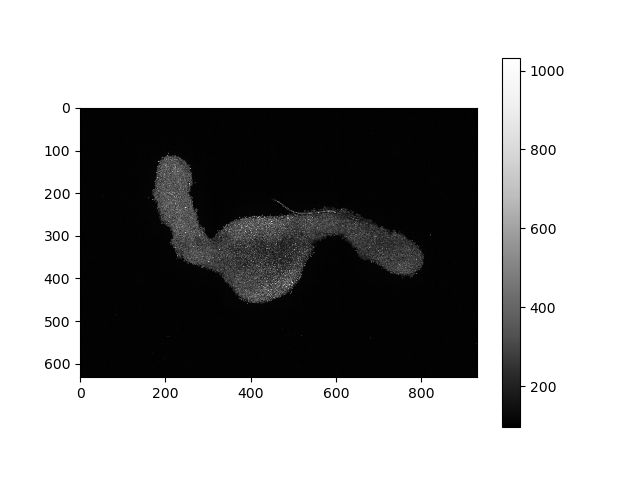
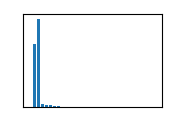

In [8]:
zoom = 0.5

scaled = cle.scale(image, 
                   factor_x=voxel_size[2] * zoom,
                   factor_y=voxel_size[1] * zoom,
                   factor_z=voxel_size[0] * zoom,
                   auto_size=True,
                   linear_interpolation=True
                  )
scaled

## Binarization
We then turn the dataset into a binary image to turn it into a surface afterwards.

cl.OCLArray([[[84.672035, 84.59867 , 84.52469 , ..., 84.69389 , 84.76257 ,
         84.83622 ],
        [84.60831 , 84.54785 , 84.486855, ..., 84.56162 , 84.61232 ,
         84.66796 ],
        [84.55034 , 84.50206 , 84.45329 , ..., 84.43856 , 84.471794,
         84.509865],
        ...,
        [84.330215, 84.317055, 84.30492 , ..., 84.55784 , 84.53773 ,
         84.51578 ],
        [84.22725 , 84.22329 , 84.221085, ..., 84.596565, 84.588104,
         84.57829 ],
        [84.12433 , 84.1298  , 84.13776 , ..., 84.64359 , 84.64882 ,
         84.65319 ]],

       [[87.095085, 87.02441 , 86.95262 , ..., 87.03908 , 87.0989  ,
         87.16349 ],
        [87.02886 , 86.97161 , 86.91326 , ..., 86.91991 , 86.96322 ,
         87.01128 ],
        [86.96824 , 86.92355 , 86.87793 , ..., 86.81021 , 86.837654,
         86.869835],
        ...,
        [86.73184 , 86.72641 , 86.72125 , ..., 86.97757 , 86.95688 ,
         86.934296],
        [86.62984 , 86.63366 , 86.63851 , ..., 87.01552 , 87.005005,
         86.99295 ],
        [86.527985, 86.5413  , 86.556305, ..., 87.0614  , 87.06302 ,
         87.06346 ]],

       [[89.472916, 89.40496 , 89.335335, ..., 89.320915, 89.37022 ,
         89.42396 ],
        [89.40416 , 89.35006 , 89.2944  , ..., 89.21661 , 89.2511  ,
         89.29009 ],
        [89.34081 , 89.29976 , 89.25724 , ..., 89.122086, 89.1426  ,
         89.167625],
        ...,
        [89.0878  , 89.09009 , 89.091934, ..., 89.347755, 89.32705 ,
         89.304306],
        [88.98675 , 88.9984  , 89.01029 , ..., 89.384476, 89.37243 ,
         89.35855 ],
        [88.88599 , 88.90722 , 88.92933 , ..., 89.428696, 89.42711 ,
         89.42401 ]],

       ...,

       [[97.46909 , 97.37497 , 97.279106, ..., 96.4348  , 96.418365,
         96.40139 ],
        [97.37043 , 97.29225 , 97.212654, ..., 96.41016 , 96.3927  ,
         96.37536 ],
        [97.274826, 97.21203 , 97.14821 , ..., 96.39379 , 96.376   ,
         96.35892 ],
        ...,
        [96.70422 , 96.75609 , 96.80541 , ..., 96.738716, 96.73513 ,
         96.73233 ],
        [96.65905 , 96.71677 , 96.77213 , ..., 96.70143 , 96.69866 ,
         96.69732 ],
        [96.61515 , 96.67898 , 96.74073 , ..., 96.66329 , 96.66083 ,
         96.66056 ]],

       [[96.72574 , 96.620636, 96.514084, ..., 95.6171  , 95.59157 ,
         95.56509 ],
        [96.615074, 96.52771 , 96.43926 , ..., 95.58958 , 95.563805,
         95.53775 ],
        [96.507385, 96.437225, 96.366394, ..., 95.5709  , 95.545654,
         95.520744],
        ...,
        [95.898865, 95.951744, 96.002205, ..., 95.883644, 95.88059 ,
         95.87907 ],
        [95.85948 , 95.91736 , 95.973015, ..., 95.832054, 95.82972 ,
         95.8297  ],
        [95.8214  , 95.88457 , 95.94576 , ..., 95.77921 , 95.77702 ,
         95.778114]],

       [[95.9676  , 95.85144 , 95.73416 , ..., 94.78101 , 94.74606 ,
         94.70972 ],
        [95.84556 , 95.748886, 95.65147 , ..., 94.75144 , 94.71718 ,
         94.682205],
        [95.72633 , 95.64863 , 95.57061 , ..., 94.731224, 94.69847 ,
         94.66566 ],
        ...,
        [95.07927 , 95.13313 , 95.18471 , ..., 95.012245, 95.00975 ,
         95.0094  ],
        [95.04581 , 95.103874, 95.15983 , ..., 94.94637 , 94.9445  ,
         94.94573 ],
        [95.01369 , 95.07622 , 95.13691 , ..., 94.87882 , 94.876976,
         94.87935 ]]], dtype=float32)
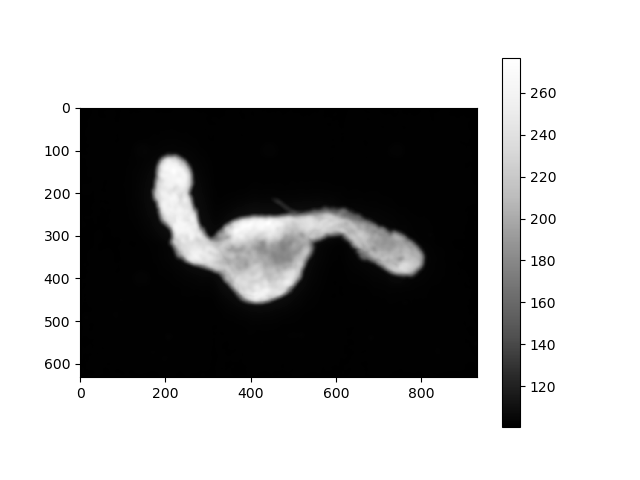
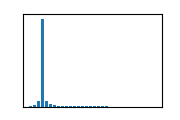

In [9]:
sigma = 5
blurred = cle.gaussian_blur(scaled, 
                            sigma_x=sigma,
                            sigma_y=sigma,
                            sigma_z=sigma,
                           )
blurred

cl.OCLArray([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
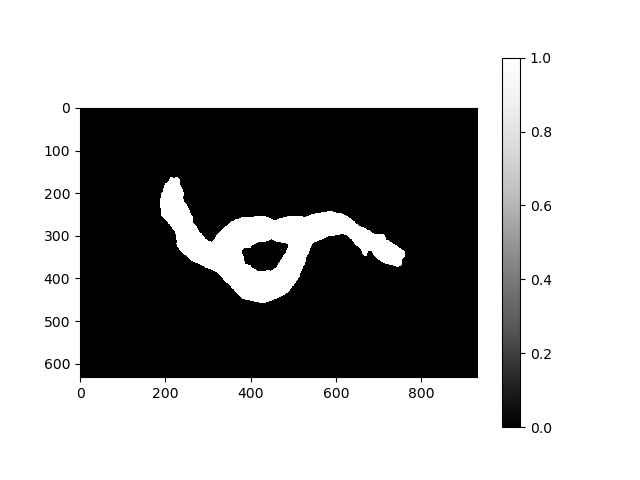
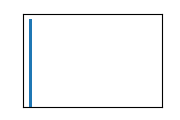

In [10]:
binary = blurred > blurred.max() * 0.5
binary[75]

In case the object has inner holes, we should fill them to prevent inner surfaces being generated.

StackViewNDArray([[0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
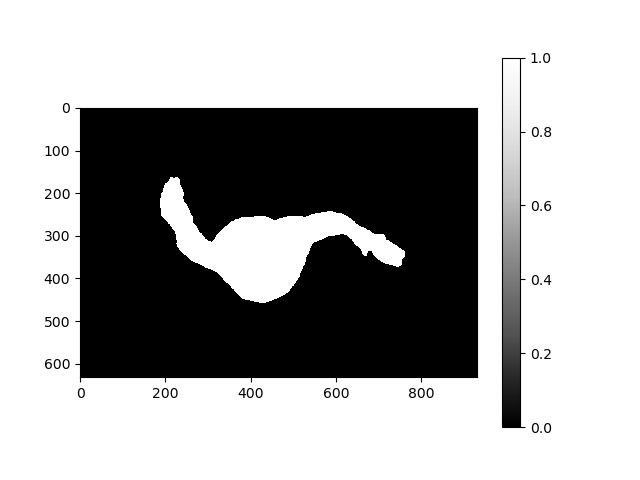
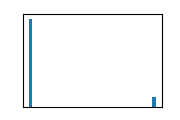

In [11]:
binary_filled = nsitk.binary_fill_holes(binary)
binary_filled[75]

## Generating surfaces
We first generate a surface forom the binary image.

In [12]:
surface = nppas.all_labels_to_surface(binary_filled)

The resulting object is visualized in Jupyter notebooks like this:

(array([[ 12.5, 215. , 224. ],
        [ 13. , 214.5, 224. ],
        [ 13. , 215. , 223.5],
        ...,
        [113.5, 356. , 423. ],
        [113.5, 356. , 424. ],
        [113.5, 356. , 425. ]]),
 array([[     2,      1,      0],
        [     3,      0,      1],
        [     6,      5,      4],
        ...,
        [332234, 331992, 331994],
        [332234, 331994, 332235],
        [332235, 331994, 331965]], dtype=int64))
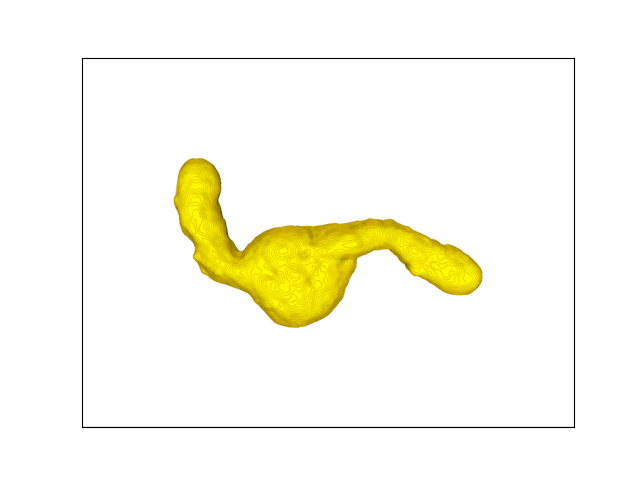

In [13]:
surface

As `> 100000` faces are a bit heavy, we simplify the mesh.

(array([[ 13.350468, 224.74281 , 225.16551 ],
        [ 13.402716, 215.6347  , 221.71007 ],
        [ 13.405661, 219.80322 , 230.87416 ],
        ...,
        [112.37943 , 357.7101  , 433.3927  ],
        [112.291046, 363.939   , 421.2268  ],
        [113.00919 , 357.6267  , 422.36804 ]], dtype=float32),
 array([[   0,    1,    2],
        [   3,    4,    5],
        [   6,    4,    7],
        ...,
        [3318, 3317, 3316],
        [3316, 3323, 3318],
        [3318, 3323, 3319]], dtype=int64))
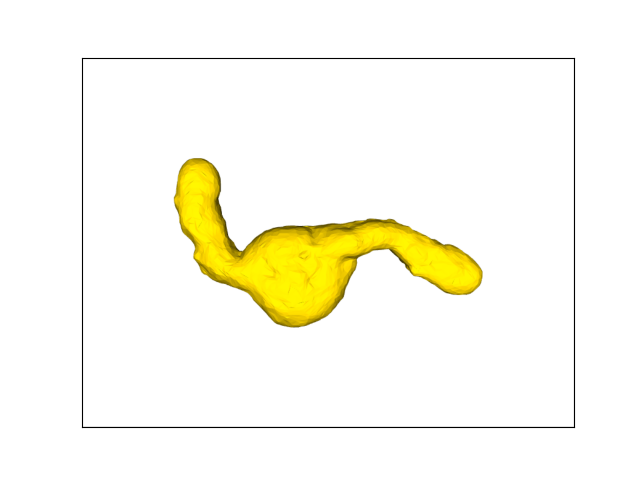

In [14]:
simplified_surface = nppas.decimate_quadric(surface, fraction=0.01)
simplified_surface

(array([[ 14.17436329, 220.40598582, 224.08285005],
        [ 13.98307601, 208.15876543, 220.32153815],
        [ 14.81901145, 219.06023328, 229.45579929],
        ...,
        [112.18208383, 356.98364528, 430.36831821],
        [112.37840279, 360.45857032, 421.84250451],
        [112.8654226 , 352.25610194, 422.17349448]]),
 array([[   0,    1,    2],
        [   3,    4,    5],
        [   6,    4,    7],
        ...,
        [3318, 3317, 3316],
        [3316, 3323, 3318],
        [3318, 3323, 3319]], dtype=int64))
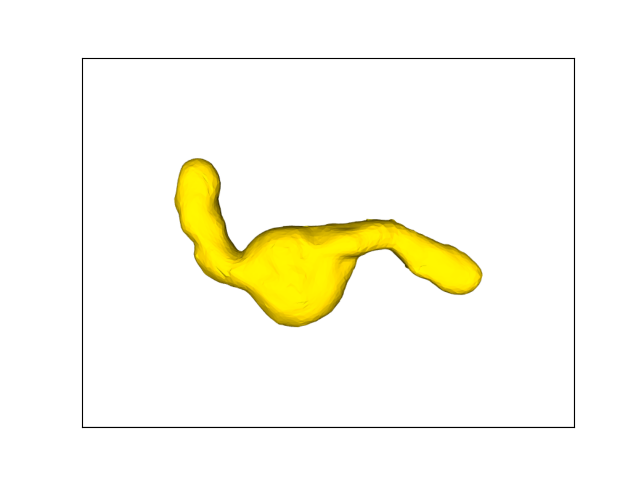

In [15]:
smoothed_surface = nppas.smooth_surface(simplified_surface)
smoothed_surface

## Saving surfaces to disk

In [16]:
mesh = nppas.to_vedo_mesh(smoothed_surface)

filename = "../napari_process_points_and_surfaces/data/gastruloid.ply"

_ = vedo.write(mesh, filename)

## Loading meshes from disk

In [17]:
new_mesh = vedo.load(filename)

(array([[ 14.174363, 220.40599 , 224.08286 ],
        [ 13.983076, 208.15877 , 220.32153 ],
        [ 14.819012, 219.06023 , 229.4558  ],
        ...,
        [112.18208 , 356.98364 , 430.36832 ],
        [112.3784  , 360.45856 , 421.8425  ],
        [112.865425, 352.2561  , 422.1735  ]], dtype=float32),
 array([[   0,    1,    2],
        [   3,    4,    5],
        [   6,    4,    7],
        ...,
        [3318, 3317, 3316],
        [3316, 3323, 3318],
        [3318, 3323, 3319]], dtype=int64))
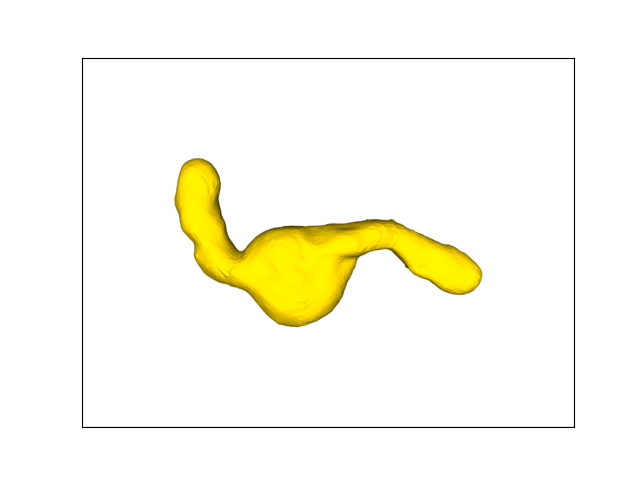

In [18]:
new_surface = nppas.to_napari_surface_data(new_mesh)
new_surface